# 图论
## 最短路径
### Dijkstra
#### 有向图

In [8]:
from collections import defaultdict
from heapq import *
import numpy as np
import pandas as pd
import networkx as nx
import pylab

In [9]:
Inf = float('inf')
Adjacent = [[0, 1, 12, Inf, Inf, Inf],
            [Inf, 0, 9, 3, Inf, Inf],
            [Inf, Inf, 0, Inf, 5, Inf],
            [Inf, Inf, 4, 0, 13, 15],
            [Inf, Inf, Inf, Inf, 0, 4],
            [Inf, Inf, Inf, Inf, Inf, 0]]
Src, Dst, N = 0, 5, 6


def dijstra(adj, src, dst, n):
    dist = [Inf] * n
    dist[src] = 0
    book = [0] * n  # 记录已经确定的顶点
    # 每次找到起点到该点的最短途径
    u = src
    for _ in range(n - 1):  # 找n-1次
        book[u] = 1  # 已经确定
        # 更新距离并记录最小距离的结点
        next_u, minVal = None, float('inf')
        for v in range(n):  # w
            w = adj[u][v]
            if w == Inf:  # 结点u和v之间没有边
                continue
            if not book[v] and dist[u] + w < dist[v]:  # 判断结点是否已经确定了，
                dist[v] = dist[u] + w
                if dist[v] < minVal:
                    next_u, minVal = v, dist[v]
        # 开始下一轮遍历
        u = next_u
    print(dist)

In [10]:
dijstra(Adjacent, 0, 5, 6)

[0, 1, 8, 4, 13, 17]


#### 无向图和有向图的混合图

<img src="../images/iShot2021-08-18 10.29.20.png"/>
<img src="../images/iShot2021-08-18 10.32.30.png"/>

[原网页](https://blog.csdn.net/qq_39798423/article/details/89294781?spm=1001.2014.3001.5501)

In [11]:
inf = float('inf')
mtx_graph = [[0, 1, inf, 3, inf, inf, inf, inf, inf],
             [1, 0, 5, inf, 2, inf, inf, inf, inf],
             [inf, inf, 0, 1, inf, 6, inf, inf, inf],
             [inf, inf, inf, 0, inf, 7, inf, 9, inf],
             [inf, 2, 3, inf, 0, 4, 2, inf, 8],
             [inf, inf, 6, 7, inf, 0, inf, 2, inf],
             [inf, inf, inf, inf, inf, 1, 0, inf, 3],
             [inf, inf, inf, inf, inf, inf, 1, 0, 2],
             [inf, inf, inf, inf, 8, inf, 3, 2, 0]]

In [12]:
m_n = len(mtx_graph)  #带权连接矩阵的阶数
edges = []  #保存连通的两个点之间的距离(点A、点B、距离)
for i in range(m_n):
    for j in range(m_n):
        if i != j and mtx_graph[i][j] != inf:
            edges.append((i, j, mtx_graph[i][j]))


def Dijkstra(edges, from_node, to_node):
    go_path = []
    to_node = to_node - 1
    g = defaultdict(list)
    for l, r, c in edges:
        g[l].append((c, r))
    q, seen = [(0, from_node - 1, ())], set()
    while q:
        (cost, v1, path) = heappop(q)  #堆弹出当前路径最小成本
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == to_node:
                break
            for c, v2 in g.get(v1, ()):
                if v2 not in seen:
                    heappush(q, (cost + c, v2, path))
    if v1 != to_node:  #无法到达
        return inf, []
    if len(path) > 0:
        left = path[0]
        go_path.append(left)
        right = path[1]
        while len(right) > 0:
            left = right[0]
            go_path.append(left)
            right = right[1]
        go_path.reverse()  #逆序变换
        for i in range(len(go_path)):  #标号加1
            go_path[i] = go_path[i] + 1
    return cost, go_path


leght, path = Dijkstra(edges, 1, 9)
print('最短距离为：' + str(leght))
print('前进路径为：' + str(path))

最短距离为：8
前进路径为：[1, 2, 5, 7, 9]


### Floyd
![](../images/iShot2021-08-18 14.11.01.png)

In [13]:
def Floyd(graph):
    N = len(graph)
    A = np.array(graph)
    path = np.zeros((N, N))

    for i in range(0, N):
        for j in range(0, N):
            if A[i][j] != inf:
                path[i][j] = j

    for k in range(0, N):
        for i in range(0, N):
            for j in range(0, N):
                if A[i][k] + A[k][j] < A[i][j]:
                    A[i][j] = A[i][k] + A[k][j]
                    path[i][j] = path[i][k]

    for i in range(0, N):
        for j in range(0, N):
            path[i][j] = path[i][j] + 1

    print('距离 = ')
    print(A)
    print('路径 = ')
    print(path)


Floyd(mtx_graph)

距离 = 
[[ 0.  1.  6.  3.  3.  6.  5.  8.  8.]
 [ 1.  0.  5.  4.  2.  5.  4.  7.  7.]
 [21. 20.  0.  1. 18.  6.  9.  8. 10.]
 [22. 21. 13.  0. 19.  7. 10.  9. 11.]
 [ 3.  2.  3.  4.  0.  3.  2.  5.  5.]
 [15. 14.  6.  7. 12.  0.  3.  2.  4.]
 [14. 13.  7.  8. 11.  1.  0.  3.  3.]
 [13. 12.  8.  9. 10.  2.  1.  0.  2.]
 [11. 10. 10. 11.  8.  4.  3.  2.  0.]]
路径 = 
[[1. 2. 2. 4. 2. 2. 2. 2. 2.]
 [1. 2. 3. 1. 5. 5. 5. 5. 5.]
 [6. 6. 3. 4. 6. 6. 6. 6. 6.]
 [8. 8. 6. 4. 8. 6. 8. 8. 8.]
 [2. 2. 3. 3. 5. 7. 7. 7. 7.]
 [8. 8. 3. 4. 8. 6. 8. 8. 8.]
 [9. 9. 6. 6. 9. 6. 7. 6. 9.]
 [9. 9. 7. 7. 9. 7. 7. 8. 9.]
 [5. 5. 7. 7. 5. 7. 7. 8. 9.]]


- 从①到⑨的距离为8（距离矩阵 第一行第九列数值）
- 路径为[1-2-5-7-9]（看路径矩 阵从①到⑨看第一行第九列的 数值为2，这是中间位置②，再 转到第二行第九列看数值为5， 得到第二个中间位置⑤，再转 到第五行第九列，一直找到⑨， 就能得到路径为【1 - 2 - 5 - 7 - 9】）

## 航线问题
数据集来自航空业，有一些关于航线的基本信息。有某段旅程的起 始点和目的地。还有一些列表示每段旅程的到达和起飞时间。这个 数据集非常适合作为图进行分析。想象一下通过航线（边）连接的 几个城市（节点）。如果你是航空公司，你可以问如下几个问题：

- 从A到B的最短途径是什么？分别从距离和时间角度考虑。
- 有没有办法从C到D？
- 哪些机场的交通最繁忙？
- 哪个机场位于大多数其他机场“之间”？这样它就可以变成 当地的一个中转站。

In [14]:
data = pd.read_csv('../data/flights.csv', nrows=100)
data.shape

(100, 19)

In [15]:
#将sched_dep_time转换为'std'—预定的出发时间
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(
    str).str.extract('(\d{2}$)', expand=False) + ':00'
#将sched_arr_time转换为“sta”—预定到达时间
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(
    str).str.extract('(\d{2}$)', expand=False) + ':00'
#将dep_time转换为'atd' -实际出发时间
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)',
                                                                               '') + ':' + data.dep_time.fillna(
    0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
#将arr_time转换为'ata' -实际到达时间
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)',
                                                                               '') + ':' + data.arr_time.fillna(
    0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data = data.drop(columns=['year', 'month', 'day'])

/Users/Bureaux/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Bureaux/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/Bureaux/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/Users/Bureaux/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [16]:
data.to_csv("../data/flights_export.csv")
data.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,air_time,distance,hour,minute,time_hour,std,sta,atd,ata,date
0,517,515,2.0,830,819,11.0,UA,1545,N14228,EWR,...,227.0,1400.0,5.0,15.0,2013-01-01T05:00:00Z,5:15:00,8:19:00,5:17:00,8:30:00,2013-01-01
1,533,529,4.0,850,830,20.0,UA,1714,N24211,LGA,...,227.0,1416.0,5.0,29.0,2013-01-01T05:00:00Z,5:29:00,8:30:00,5:33:00,8:50:00,2013-01-01
2,542,540,2.0,923,850,33.0,AA,1141,N619AA,JFK,...,160.0,1089.0,5.0,40.0,2013-01-01T05:00:00Z,5:40:00,8:50:00,5:42:00,9:23:00,2013-01-01
3,544,545,-1.0,1004,1022,-18.0,B6,725,N804JB,JFK,...,183.0,1576.0,5.0,45.0,2013-01-01T05:00:00Z,5:45:00,10:22:00,5:44:00,10:04:00,2013-01-01
4,554,600,-6.0,812,837,-25.0,DL,461,N668DN,LGA,...,116.0,762.0,6.0,0.0,2013-01-01T06:00:00Z,6:00:00,8:37:00,5:54:00,8:12:00,2013-01-01


In [17]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True, )

In [18]:
FG.nodes()  # 查看所有节点

NodeView(('EWR', 'IAH', 'LGA', 'JFK', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI', 'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW', 'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC', 'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ'))

In [19]:
FG.edges()  # 查看所有边

EdgeView([('EWR', 'IAH'), ('EWR', 'ORD'), ('EWR', 'FLL'), ('EWR', 'SFO'), ('EWR', 'LAS'), ('EWR', 'PBI'), ('EWR', 'MIA'), ('EWR', 'ATL'), ('EWR', 'PHX'), ('EWR', 'MSP'), ('EWR', 'LAX'), ('EWR', 'CLT'), ('EWR', 'IAD'), ('EWR', 'SNA'), ('EWR', 'TPA'), ('EWR', 'RSW'), ('EWR', 'SJU'), ('EWR', 'SEA'), ('EWR', 'DFW'), ('EWR', 'DEN'), ('EWR', 'MCO'), ('IAH', 'LGA'), ('LGA', 'ATL'), ('LGA', 'IAD'), ('LGA', 'ORD'), ('LGA', 'DFW'), ('LGA', 'FLL'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'MIA'), ('LGA', 'BWI'), ('LGA', 'MCO'), ('LGA', 'DEN'), ('LGA', 'PBI'), ('LGA', 'XNA'), ('LGA', 'MKE'), ('LGA', 'RSW'), ('LGA', 'TPA'), ('LGA', 'CLT'), ('JFK', 'MIA'), ('JFK', 'BQN'), ('JFK', 'MCO'), ('JFK', 'PBI'), ('JFK', 'TPA'), ('JFK', 'LAX'), ('JFK', 'BOS'), ('JFK', 'ATL'), ('JFK', 'SFO'), ('JFK', 'RSW'), ('JFK', 'SJU'), ('JFK', 'PHX'), ('JFK', 'BUF'), ('JFK', 'LAS'), ('JFK', 'MSY'), ('JFK', 'SLC'), ('JFK', 'FLL'), ('JFK', 'ROC'), ('JFK', 'SYR'), ('JFK', 'SRQ'), ('JFK', 'SEA')])

{21: 2.119047619047619,
 2: 20.192307692307693,
 18: 2.1666666666666665,
 3: 20.0,
 1: 20.076923076923077}

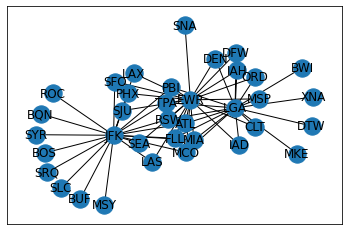

In [20]:
nx.draw_networkx(FG, with_labels=True)  #快速查看图表,发现3个十分繁忙的机场
nx.algorithms.degree_centrality(FG)#100条记录3机场
nx.density(FG) # 图的平均边密度 0.09047619047619047
nx.average_shortest_path_length(FG) #图中所有路径的平均最短路径长度2.36984126984127
nx.average_degree_connectivity(FG) #对于一个度为k的节点-它的邻居度的平均值是多少?

In [21]:
for path in nx.all_simple_paths(FG, source='MKE', target='BOS'):
    print(path)
dijpath = nx.dijkstra_path(FG, source='MKE', target='BOS')
dijpath

['MKE', 'LGA', 'IAH', 'EWR', 'FLL', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'SFO', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'LAS', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'PBI', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'MIA', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'ATL', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'PHX', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'LAX', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'TPA', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'RSW', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'SJU', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'SEA', 'JFK', 'BOS']
['MKE', 'LGA', 'IAH', 'EWR', 'MCO', 'JFK', 'BOS']
['MKE', 'LGA', 'ATL', 'JFK', 'BOS']
['MKE', 'LGA', 'ATL', 'EWR', 'FLL', 'JFK', 'BOS']
['MKE', 'LGA', 'ATL', 'EWR', 'SFO', 'JFK', 'BOS']
['MKE', 'LGA', 'ATL', 'EWR', 'LAS', 'JFK', 'BOS']
['MKE', 'LGA', 'ATL', 'EWR', 'PBI', 'JFK', 'BOS']
['MKE', 'LGA', 'ATL', 'EWR', 'MIA', 'JFK', 'BOS']
['MKE', 'LGA', 'ATL', 'EWR', 'PHX', 'JFK', 'BOS']
['MKE', 'LGA',

['MKE', 'LGA', 'ATL', 'JFK', 'BOS']

In [22]:
shortpath = nx.dijkstra_path(FG, source='MKE', target='BOS', weight='air_time')
shortpath

['MKE', 'LGA', 'ATL', 'JFK', 'BOS']

生成一个空的有向图
为这个网络添加节点...
在网络中添加带权中的边...
给网路设置布局...
画出网络图像：


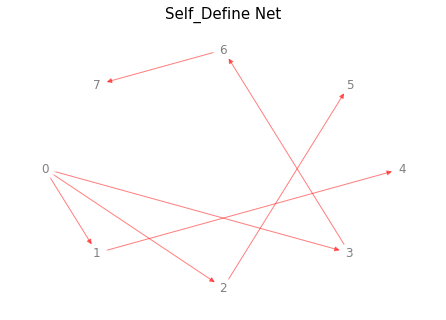

dijkstra方法寻找最短路径：
节点0到7的路径： [0, 3, 6, 7]
dijkstra方法寻找最短距离：
节点0到7的距离为： 9


In [23]:
#自定义网络
row=np.array([0,0,0,1,2,3,6])
col=np.array([1,2,3,4,5,6,7])
value=np.array([1,2,1,8,1,3,5])

print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(0,np.size(col)+1):
    G.add_node(i)
print('在网络中添加带权中的边...')
for i in range(np.size(row)):
    G.add_weighted_edges_from([(row[i],col[i],value[i])])

print('给网路设置布局...')
pos=nx.shell_layout(G)
print('画出网络图像：')
nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )
pylab.title('Self_Define Net',fontsize=15)
pylab.show()


'''
Shortest Path with dijkstra_path
'''
print('dijkstra方法寻找最短路径：')
path=nx.dijkstra_path(G, source=0, target=7)
print('节点0到7的路径：', path)
print('dijkstra方法寻找最短距离：')
distance=nx.dijkstra_path_length(G, source=0, target=7)
print('节点0到7的距离为：', distance)